In [12]:
import numpy as np
import pandas as pd
from dotenv import load_dotenv
import os
import spotipy
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import string
import re

import joblib


load_dotenv()
SPOTIFY_KEY1 = os.getenv('SPOTIFY_KEY1')
SPOTIFY_KEY2 = os.getenv('SPOTIFY_KEY2')
SPOTIFY_DATA = os.getenv('SPOTIFY_DATA')
TCC_DATA = os.getenv('TCC_DATA')

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(SPOTIFY_KEY1,
                                                                              SPOTIFY_KEY2))

In [4]:
tracks_df = pd.read_csv(SPOTIFY_DATA)
features = ['valence', 'acousticness', 'danceability', 'energy', 'explicit', 'instrumentalness', 'key', 'loudness', 'mode', 'speechiness', 'tempo' ]

In [6]:
reduced_df = tracks_df[:2000]
# pd.plotting.scatter_matrix(reduced_df[features], figsize=(20,12))

In [7]:
reduced_df.corr()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
valence,1.000000,-0.023614,0.060014,0.593436,-0.376172,0.407305,-0.076705,-0.011159,0.054676,-0.046150,0.355033,0.026941,-0.043216,-0.001657,0.292332
year,-0.023614,1.000000,-0.174359,0.168417,-0.044807,-0.061575,0.286660,-0.134198,0.014141,-0.037670,-0.025349,-0.002306,0.096119,0.313488,0.012782
acousticness,0.060014,-0.174359,1.000000,-0.192586,0.071374,-0.204052,-0.689840,0.318053,-0.033288,-0.054574,0.036958,0.058337,0.125941,-0.634383,-0.015690
danceability,0.593436,0.168417,-0.192586,1.000000,-0.323632,0.190921,0.206565,-0.242341,0.015868,-0.125331,0.315292,0.030209,0.041181,0.305105,0.102241
duration_ms,-0.376172,-0.044807,0.071374,-0.323632,1.000000,-0.044279,-0.155156,0.140405,-0.002214,0.037533,-0.034853,0.055954,0.131568,-0.242915,-0.107426
energy,0.407305,-0.061575,-0.204052,0.190921,-0.044279,1.000000,-0.022525,-0.046174,0.001663,0.161342,0.649615,0.001631,-0.047636,-0.013972,0.208381
explicit,-0.076705,0.286660,-0.689840,0.206565,-0.155156,-0.022525,1.000000,-0.276412,0.009907,0.056837,-0.143700,-0.033745,-0.171667,0.791756,-0.040622
instrumentalness,-0.011159,-0.134198,0.318053,-0.242341,0.140405,-0.046174,-0.276412,1.000000,0.051668,-0.066743,-0.223519,-0.051044,-0.007267,-0.311901,0.033395
key,0.054676,0.014141,-0.033288,0.015868,-0.002214,0.001663,0.009907,0.051668,1.000000,-0.029416,-0.044473,-0.089586,-0.057285,0.028510,0.014816
liveness,-0.046150,-0.037670,-0.054574,-0.125331,0.037533,0.161342,0.056837,-0.066743,-0.029416,1.000000,0.060390,0.001600,-0.029949,0.100719,-0.039487


In [9]:
model = KMeans(n_clusters=5)

model.fit(tracks_df[features])

KMeans(n_clusters=5)

<AxesSubplot:>

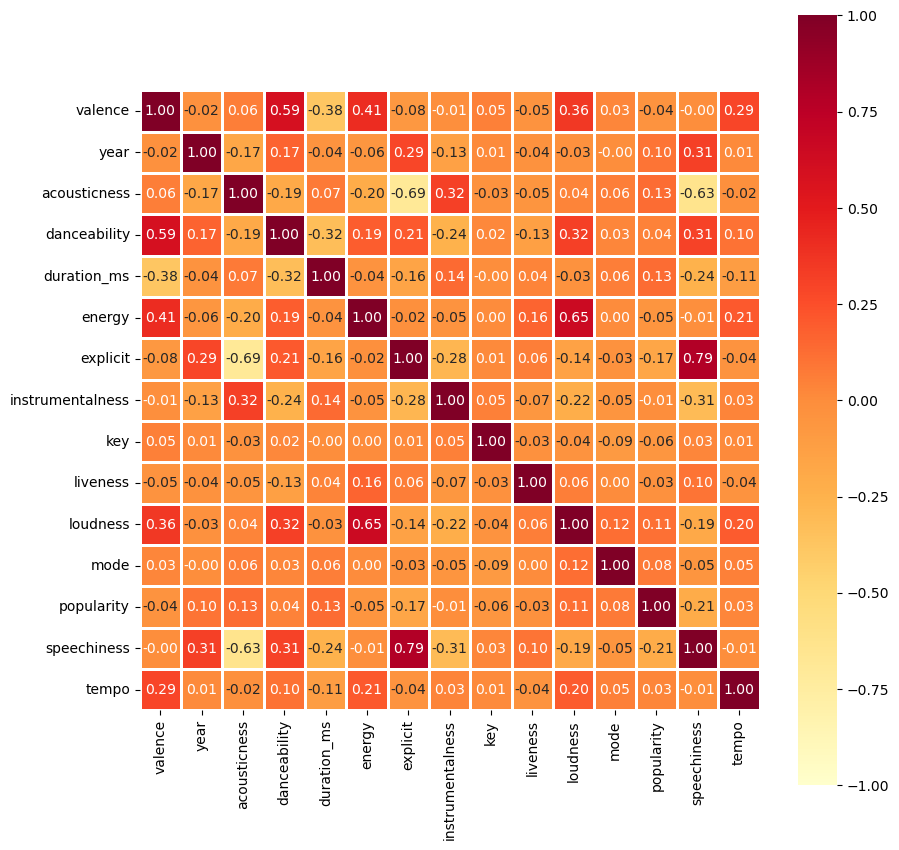

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(reduced_df.corr(),
            annot=True,
            cmap='YlOrRd', #colors
            cbar=True, # colorbar
            linewidths=1,
            square=True,
            fmt='.2f',
            vmin=-1,
            vmax=1)

In [17]:
print(model.labels_[:10], '\n\n', min(model.labels_), max(model.labels_))

[4 4 3 1 1 3 4 1 4 1] 

 0 4


In [18]:
tracks_df['type'] = model.labels_
tracks_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,type
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,4
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,4
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,3
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,1
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,1


In [23]:
tracks_df.to_csv('./result.csv')

In [ ]:
tracks = pd.read_csv('./result.csv')

In [28]:
def getURI(link):
    return link.split("/")[-1].split("?")[0]

In [34]:
ids = input('Enter comma-separated ids of your favorite songs\n> ').strip().split(',')
# sample input: 1xK1Gg9SxG8fy2Ya373oqb,1xQ6trAsedVPCdbtDAmk0c,7ytR5pFWmSjzHJIeQkgog4,079Ey5uxL04AKPQgVQwx5h,0lizgQ7Qw35od7CYaoMBZb,7r9ZhitdQBONTFOiJW5mr8,3ee8Jmje8o58CHK66QrVC2,3ZG8N7aWw2meb6UrI5ZmnZ,5cpJFiNwYyWwFLH0V6B3N8,26w9NTiE9NGjW1ZvIOd1So,7BIy3EGQhg98CsRdKYHnJC,2374M0fQpWi3dLnB54qaLX,2IVsRhKrx8hlQBOWy4qebo,40riOy7x9W7GXjyGp4pjAv,4evmHXcjt3bTUHD1cvny97,0MF5QHFzTUM2dYm6J7Vngt,0TrPqhAMoaKUFLR7iYDokf,07KXEDMj78x68D884wgVEm,6gxKUmycQX7uyMwJcweFjp

# search the specified ids in this dataset and get the tracks
favorites = tracks[tracks.id.isin(ids)]

# code to sort find out the maximum occuring cluster number according to user's favorite track types
cluster_numbers = list(favorites['type'])
clusters = {}
for num in cluster_numbers:
  clusters[num] = cluster_numbers.count(num)

# sort the cluster numbers and find out the number which occurs the most
user_favorite_cluster = [(k, v) for k, v in sorted(clusters.items(), key=lambda item: item[1])][0][0]

print('\nFavorite cluster:', user_favorite_cluster, '\n')

# finally get the tracks of that cluster
suggestions = tracks[tracks.type == user_favorite_cluster]

# now print the first 5 rows of the data frame having that cluster number as their type
print(suggestions.head())

Enter comma-separated ids of your favorite songs
> 4BJqT0PrAfrxzMOxytFOIz	

Favorite cluster: 4 

    Unnamed: 0  valence  year  acousticness  \
0            0   0.0594  1921         0.982   
1            1   0.9630  1921         0.732   
6            6   0.4060  1921         0.996   
8            8   0.7210  1921         0.996   
10          10   0.8260  1921         0.995   

                                              artists  danceability  \
0   ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                      ['Dennis Day']         0.819   
6                                  ['John McCormack']         0.518   
8                                 ['Ignacio Corsini']         0.485   
10                              ['Maurice Chevalier']         0.463   

    duration_ms  energy  explicit                      id  ...  key  liveness  \
0        831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz  ...   10     0.665   
1        180533   0.341       